# Analogous-bars method
* Run the similarity-centric analogous bars method between simulated grid cells and conjunctive cells

In [2]:
# activate environment
using Pkg
Pkg.activate("../../env/.")
Pkg.instantiate()

  Activating project at `~/analogous_neural/env`


In [3]:
include("../../src/analogous_bars.jl")
include("../../src/Eirene_var.jl")

using .analogous_bars
using .Eirene_var
using DelimitedFiles
using Printf
using HDF5
using Plots
using JLD

WebIO._IJuliaInit()

# 1. Load distance matrices


In [4]:
directory = "simulated_data/"

n_grid = 200
n_conj = 800

D_grid = h5read(directory * "grid_dissimilarity.h5", "distance")
D_grid = vector_to_symmetric_matrix(D_grid, n_grid)

D_conj = h5read(directory * "conj_dissimilarity.h5", "distance")
D_conj = vector_to_symmetric_matrix(D_conj, n_conj)

D_grid_conj = h5read(directory * "conj_grid_rate_dissimilarity.h5", "distance")
D_conj_grid = Array(transpose(D_grid_conj));

# 2. Compute persistence

In [5]:
dim = 1

# VR persistence
VR_grid = eirene(D_grid, record = "all", maxdim = dim)
VR_conj = eirene(D_conj, record = "all", maxdim = dim);

# Witness persistence
W_grid_conj = compute_Witness_persistence(D_grid_conj, maxdim = dim);

In [6]:
# get barcodes
barcode_VR_grid = barcode(VR_grid, dim = 1)
barcode_VR_conj = barcode(VR_conj, dim = 1)
barcode_W_grid_conj = barcode(W_grid_conj["eirene_output"], dim = 1);

In [7]:
# compute persistene cutoff scores
grid_idx, grid_cutoff = select_persistent_intervals_IQR(barcode_VR_grid)
W_idx, W_cutoff = select_persistent_intervals_IQR(barcode_W_grid_conj)
conj_idx, conj_cutoff = select_persistent_intervals_IQR(barcode_VR_conj);

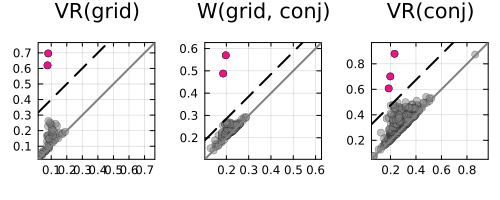

In [8]:
# plot persistence diagrams
p1 = plot_PD(barcode_VR_grid, title = "VR(grid)", highlight = grid_idx, cutoff = grid_cutoff)
p2 = plot_PD(barcode_W_grid_conj, title = "W(grid, conj)", highlight = W_idx, cutoff = W_cutoff)
p3 = plot_PD(barcode_VR_conj, title = "VR(conj)", highlight = conj_idx, cutoff = conj_cutoff)
plot(p1, p2, p3, layout = grid(1,3), size = (500, 200))

# 3. Compute analogous cycles


In [ ]:
analogous_grid, analogous_conj = run_baseline_similarity_analogous(VR_P = VR_grid,
                                                                    D_P = D_grid,
                                                                    VR_Q = VR_conj,
                                                                    D_Q = D_conj,
                                                                    W_PQ = W_grid_conj,
                                                                    W_PQ_bars = W_idx,
                                                                    dim = 1);

In [14]:
# get analogous cycles among significant points
analogous_grid_sig, analogous_conj_sig = analogous_cycles_significant(analogous_grid, analogous_conj; significant_P = grid_idx , significant_Q = conj_idx)

(Dict{Any, Any}(136 => [58], 137 => [59]), Dict{Any, Any}(136 => [436], 137 => [437]))

In [18]:
# Print (potential) analogous cycles

for k in keys(analogous_grid_sig)
    println("Analogous via witness idx: ", string(k))
    println("In grid cells: ", analogous_grid_sig[k])
    println("In conj cells: ", analogous_conj_sig[k])
end

Analogous via witness idx: 136
In grid cells: [58]
In conj cells: [436]
Analogous via witness idx: 137
In grid cells: [59]
In conj cells: [437]


## Plot analogous pairs

### Analogous pair via witness bar 136

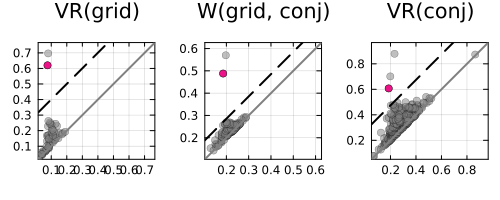

In [19]:
# plot persistence diagrams
witness_bar = 136
p1 = plot_PD(barcode_VR_grid, title = "VR(grid)", highlight = analogous_grid_sig[witness_bar], cutoff = grid_cutoff)
p2 = plot_PD(barcode_W_grid_conj, title = "W(grid, conj)", highlight = [witness_bar], cutoff = W_cutoff)
p3 = plot_PD(barcode_VR_conj, title = "VR(conj)", highlight = analogous_conj_sig[witness_bar], cutoff = conj_cutoff)
plot(p1, p2, p3, layout = grid(1,3), size = (500, 200))

### Analogous pair via Witness bar 137

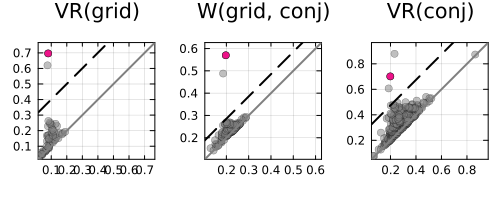

In [20]:
# plot persistence diagrams
witness_bar = 137
p1 = plot_PD(barcode_VR_grid, title = "VR(grid)", highlight = analogous_grid_sig[witness_bar], cutoff = grid_cutoff)
p2 = plot_PD(barcode_W_grid_conj, title = "W(grid, conj)", highlight = [witness_bar], cutoff = W_cutoff)
p3 = plot_PD(barcode_VR_conj, title = "VR(conj)", highlight = analogous_conj_sig[witness_bar], cutoff = conj_cutoff)
plot(p1, p2, p3, layout = grid(1,3), size = (500, 200))

Saving outputs

In [53]:
# gather barcodes
# barcodes = Dict()
# barcodes["VR_grid"] = barcode_VR_grid
# barcodes["VR_conj"] = barcode_VR_conj
# barcodes["W_grid_conj"] = barcode_W_grid_conj

# # gather the persistence cutoff and selected bars
# persistence_cutoff = Dict()
# persistence_cutoff["grid_selected"] = grid_idx
# persistence_cutoff["grid_cutoff"] = grid_cutoff
# persistence_cutoff["conj_selected"] = conj_idx
# persistence_cutoff["conj_cutoff"] = conj_cutoff
# persistence_cutoff["W_grid_conj_selected"] = W_idx
# persistence_cutoff["W_grid_conj_cutoff"] = W_cutoff;

# # gather analogous pairs
# analogous_pair = Dict()

# for i in selected
#     pair_i = Dict()
#     pair_i["order"] = ["grid", "conjunctive"]
#     pair_i["baseline_bar_ext"] = [analogous_grid[i]["baseline_bar_extension"], analogous_conj[i]["baseline_bar_extension"]]
#     pair_i["epsilon_0"] = [analogous_grid[i]["epsilon_0"], analogous_conj[i]["epsilon_0"]]
#     pair_i["min_epsilon_with_boundary"] = [analogous_grid[i]["min_epsilon_with_boundary"], analogous_conj[i]["min_epsilon_with_boundary"]]
#     analogous_pair[i] = pair_i
# end

# save output
"""
save("simulated_data/grid_conj_analogous_outputs.jld2", 
    "barcodes", barcodes,
    "persistence_cutoff", persistence_cutoff,
    "analogous_pair", analogous_pair)
"""


In [57]:
# save Witness persistence info
"""
save("simulated_data/grid_conj_W_persistence.jld2", 
   "eirene_output", W_grid_conj["eirene_output"],
    "index2simplex", W_grid_conj["index2simplex"],
    "W_vertex_to_defualt_vertex", W_grid_conj["W_vertex_to_default_vertex"])

save("simulated_data/conj_grid_W_persistence.jld2", 
    "eirene_output", W_conj_grid["eirene_output"],
    "index2simplex", W_conj_grid["index2simplex"],
    "W_vertex_to_defualt_vertex", W_conj_grid["W_vertex_to_default_vertex"])
"""